# Méthodes de la puissance

Le but de ce TP est le calcul approché des éléments propres de la matrice du Laplacien. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rd
import sys

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

np.set_printoptions(precision=4)

In [2]:
%%javascript
MathJax.Hub.Config({Tex: {equationNumbers: {autoNumber: "AMS"} } })

<IPython.core.display.Javascript object>


###  Préliminaires


#### Question 0.1 :  

> Ecrire une fonction qui prend un entier $n$ en argument et renvoie la matrice du Laplacien 
>
> $$
A = (n+1)^2 \begin{pmatrix}
2&-1&0&\ldots&0\\
-1&2&-1&\ddots&\vdots\\
0&\ddots&\ddots&\ddots&0\\
\vdots&\ddots&-1&2&-1\\
0&\ldots&0&-1&2
\end{pmatrix}\in\mathcal{M}_n(\mathbb{R}).
$$



In [3]:
## METTRE LE CODE  ICI

def MatLaplace(n):
    A = 2*np.eye(n,n) - np.eye(n,n,-1) - np.eye(n,n,1)
    return A*(n+1)**2

#print(MatLaplace(5))
print(np.linalg.eig(MatLaplace(5)))
#print(np.linalg.eigvals(MatLaplace(5)))

(array([  9.6462, 134.3538, 108.    ,  72.    ,  36.    ]), array([[-2.8868e-01,  2.8868e-01, -5.0000e-01,  5.7735e-01, -5.0000e-01],
       [-5.0000e-01, -5.0000e-01,  5.0000e-01,  1.1300e-16, -5.0000e-01],
       [-5.7735e-01,  5.7735e-01,  5.6033e-17, -5.7735e-01,  3.4267e-16],
       [-5.0000e-01, -5.0000e-01, -5.0000e-01, -7.4302e-17,  5.0000e-01],
       [-2.8868e-01,  2.8868e-01,  5.0000e-01,  5.7735e-01,  5.0000e-01]]))


#### Question 0.2 :  

> En utilisant `np.linalg.eig`, écrire une fonction `ElementsPropresExacts` qui prend en argument une matrice symétrique réelle et retourne d'une part un vecteur contenant les valeurs propres classées par valeur absolue decroissante et d'autre part une matrice dont les colonnes sont des vecteurs propres correspondants.  

In [4]:
?np.linalg.eig
#eigvalsh
#eigvals
#?np.argsort

In [5]:
def ElementsPropresExacts(A):
    VaP,VeP = np.linalg.eig(A)
    V = np.argsort(-np.abs(VaP))
   
    VaP[:] = VaP[V[:]]
   
    Vect=VeP.copy()
    for i in (V[:]):
        Vect[:,i] = VeP[:,V[i]] 
    
    return VaP, Vect
    

In [6]:
ElementsPropresExacts(MatLaplace(5))

(array([134.3538, 108.    ,  72.    ,  36.    ,   9.6462]),
 array([[ 2.8868e-01, -5.0000e-01,  5.7735e-01, -5.0000e-01, -2.8868e-01],
        [-5.0000e-01,  5.0000e-01,  1.1300e-16, -5.0000e-01, -5.0000e-01],
        [ 5.7735e-01,  5.6033e-17, -5.7735e-01,  3.4267e-16, -5.7735e-01],
        [-5.0000e-01, -5.0000e-01, -7.4302e-17,  5.0000e-01, -5.0000e-01],
        [ 2.8868e-01,  5.0000e-01,  5.7735e-01,  5.0000e-01, -2.8868e-01]]))

In [7]:
## VERIFIER LES CALCULS ICI 
A = np.array([[1,0,0],[0,2,0],[0,0,-1]])
v, P = ElementsPropresExacts(A)
print(v)
print(P)
print(np.dot(P.T, np.dot(A,P)))

A = MatLaplace(4)
v, P = ElementsPropresExacts(A)
print(v)
print(P)
print(np.dot(P.T, np.dot(A,P)))

[ 2.  1. -1.]
[[0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]]
[[ 2.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0. -1.]]
[90.4508 65.4508 34.5492  9.5492]
[[-0.3717 -0.6015 -0.6015 -0.3717]
 [ 0.6015  0.3717 -0.3717 -0.6015]
 [-0.6015  0.3717  0.3717 -0.6015]
 [ 0.3717 -0.6015  0.6015 -0.3717]]
[[ 9.0451e+01 -3.0031e-15 -6.9831e-15 -7.1054e-15]
 [-3.1726e-15  6.5451e+01  1.0658e-14  1.5681e-14]
 [-1.0353e-14  1.4211e-14  3.4549e+01  3.9699e-15]
 [-7.1054e-15  1.7783e-14  4.9942e-15  9.5492e+00]]


### Exercice 1 : méthode de la puissance

On l'utilise sous la forme de l'algorithme suivant. 

 __Initialisation :__ prendre $x_0$ tel que $\|x_0\|=1$ et poser $k=0$, $res=1$.

__Itération :__ tester si $res\geq tol$, auquel cas :
 * incrémenter $k$.
 * calculer $y=Ax_{k-1}$,
 * poser $\lambda_k = \|y\|$, $x_k = y/\lambda_k$, $res =\|x_k - x_{k-1}\|$,
 
__Sortie :__ renvoyer $\lambda_k$ et $x_k$.

#### Question 1.0 : validité théorique de l'algorithme

> Sous quelles hypothèses converge-t-il ? La matrice du Laplacien vérifie-t-elle ces hypothèses ?

\# Ajoutez votre réponse ici


#### Question 1.1 : implémentation de l'algorithme
> Ecrire une fonction `MethPuissance` qui prend en arguments :
 * une matrice carrée à coefficients réels **A**, 
 * un nombre réel **tol** qui permet d'arrêter le calcul dès que $\Vert x_{k} - x_{k-1} \Vert \leq tol$,
 * le nombre maximum d'itérations autorisé **iterMax**,
 
> et qui retourne $\lambda_k$, $x_k$ et le nombre $k$ d'itérations effectuées.


In [8]:
?rd.random

In [9]:
def MethPuissance(A, tol, iterMax):
    x = 200 * rd.random_sample(np.shape(A)[0]) -100 
    x[0] = 1
    k = 0
    res = 1
    while(res>=tol):
        k+=1
        y = A@x
        λ = np.linalg.norm(y)
        xk=y/λ
        res = np.linalg.norm(x-xk)
        x = xk
        if(k>iterMax):
            return λ,x,k
    return λ,x,k


#### Question 1.2: test de l'algorithme
> Tester cette fonction en calculant pour la matrice du Laplacien $A\in\mathcal{M}_n(\mathbb{R})$ sa plus grande valeur propre $\lambda_n$, son vecteur propre associé $x_n$ et en évaluant la quantité $ \| A x_n - \lambda_n x_n \|$. 
>
> On pourra prendre 
``` n = 3; tol = 1e-11; iterMax = 300 ```. 
> On ne prendra pas n trop grand afin de rendre possible l'affichage de $A$.

Ci-dessous une sortie possible. <span style="color:#FF0000;"> Attention : </span> vous n'aurez pas absolument les mêmes valeurs décimales.
```
lambda = 5.462742e+01,
nombre d'iterations = 45
|| A*x - lambda*x || = 2.116510e-10
```

In [10]:
λ,x,k = MethPuissance(MatLaplace(3),1e-11,300)
print("λ = ", λ)
print("nombre d'iterations = ", k)
print("|| A*x - lambda *x || = ",np.linalg.norm(MatLaplace(3)@x - λ*x ))

λ =  54.62741699796952
nombre d'iterations =  45
|| A*x - lambda *x || =  3.0063376754496756e-10



>* Que constatez- vous lorsqu'on remplace $A$ par $-A$ ?

In [11]:
λ,x,k = MethPuissance(-MatLaplace(3),1e-11,300)
print("λ = ", λ)
print("nombre d'iterations = ", k)
print("|| A *x - lambda *x || = ",np.linalg.norm(-MatLaplace(3)@x - λ*x ))

λ =  54.62741699796952
nombre d'iterations =  301
|| A *x - lambda *x || =  109.25483399593904


\# METTRE LE COMMENTAIRE ICI


#### Question 1.3:  convergence de la suite des itérés

> On souhaite évaluer la convergence de la suite des $\displaystyle \lambda_n^k$ vers $\displaystyle \lambda_n$ lorsque $k \rightarrow \infty$. 
> Ecrire pour cela une fonction `MethPuissanceDebug` qui retourne d'une part la liste des $\lambda^k_n$ et d'autre part la liste des $x_n^k$. Il n'est plus nécessaire de retourner le nombre d'itérations. 

In [15]:
def MethPuissanceDebug(A, tol, iterMax):
    N,M=A.shape
    x0=rd.rand(N)
    x0=x0/np.linalg.norm(x0)
    lamb=[]
    Xk=[]
    k=0
    res=1
    while (res >= tol and k<iterMax):
        k+=1
        y=np.dot(A,x0)
        lam=np.linalg.norm(y)
        xk=y/lam
        res=np.linalg.norm(xk-x0)
        x0=xk.copy()
        lamb.append(lam)
        Xk.append(xk)
    return lamb,Xk

>* En utilisant `MethPuissanceDebug` représentez sur deux graphiques distincts 
    + d'une part le graphe de $ k \mapsto \log |\lambda_n^k - \lambda_n |$, 
    + d'autre part le graphe de $ k \mapsto \log \|x_n^k - x_n \|$.
>
>
>* Compléter ces figures en représentant sur chacune d'elles le graphe de 
$k \mapsto k \log ({\lambda_{n-1}}/{\lambda_n})$
ou
$k \mapsto 2k \log ({\lambda_{n-1}}/{\lambda_n})$
où $\lambda_{n-1} < \lambda_n$ sont les deux plus grandes valeurs propres de $A$, toutes deux calculées à l'aide de la fonction `ElementsPropresExacts` ci-dessus.
>
> On pourra prendre :
```n = 10; tol = 1e-11; iterMax = 300  ```.
>
>* Commenter les résultats obtenus.



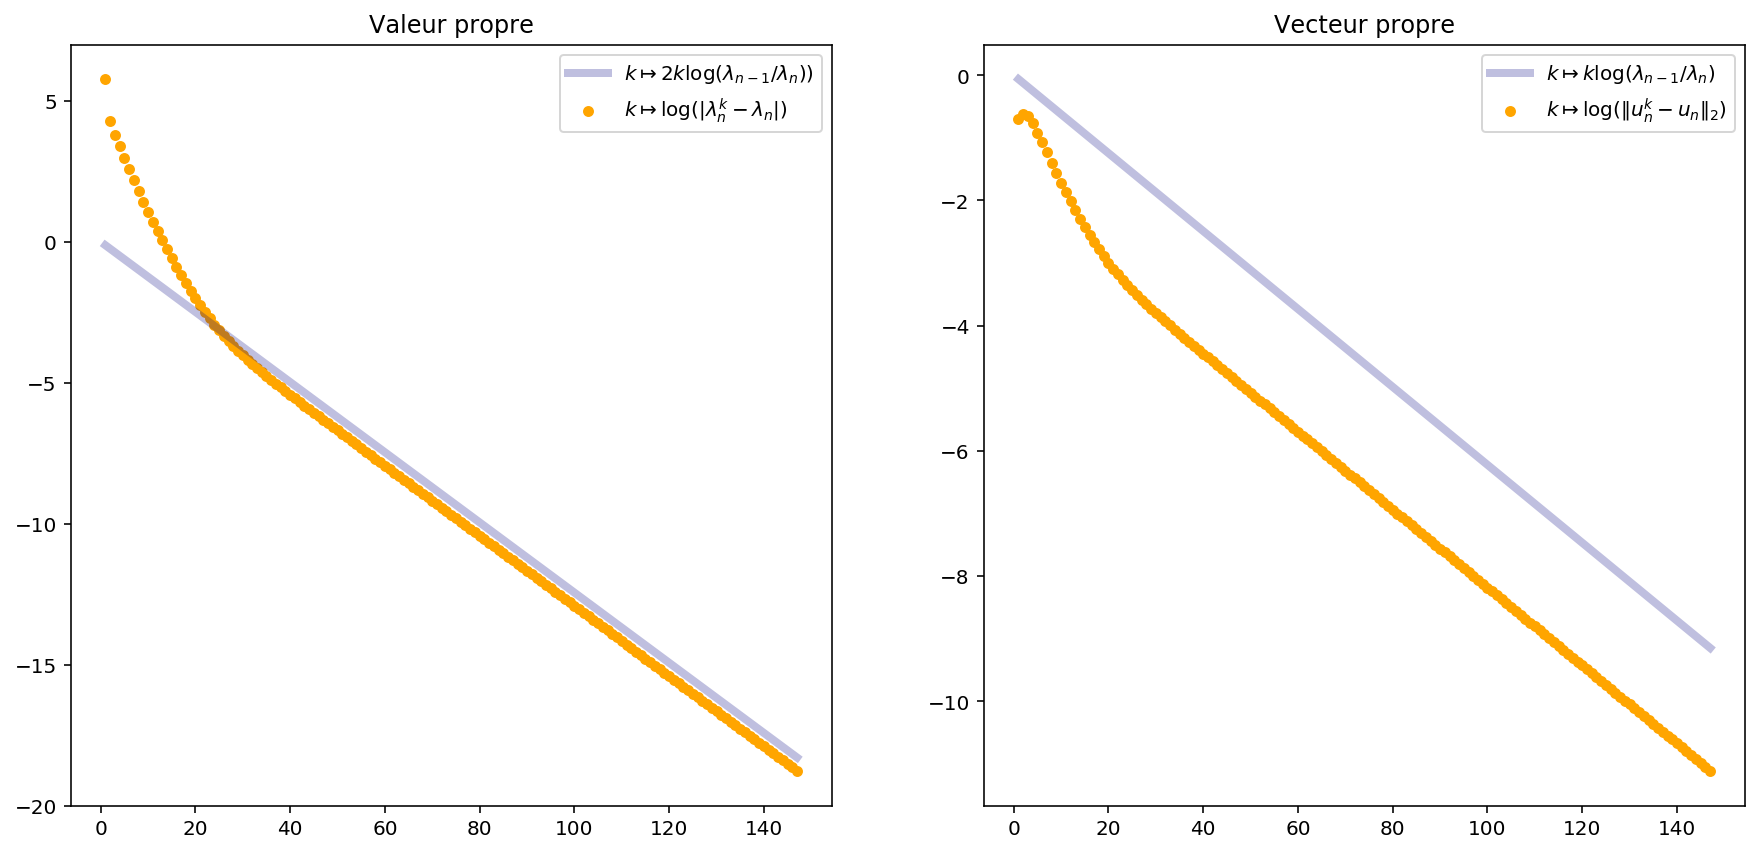

In [16]:
def testPuissanceConvergence():
    A = MatLaplace(10)
    lamb, u = MethPuissanceDebug(A, 1e-6, 1000)
    lambeL, ueL = ElementsPropresExacts(A)
    # la matrice est symétrique
    lambe, ue = lambeL[0], ueL[0]
    niters = len(lamb) 
    
    x = np.arange(1,niters+1)
    
    lamberr = np.abs(lamb - lambe)
    uerr = [np.linalg.norm(np.abs(u[i]) - np.abs(ue)) for i in range(niters)]
    
    fig, ax = plt.subplots(1,2, figsize = (15,7))
    
    ax[0].scatter(x, np.log(lamberr), 
               s=20, 
               color='orange', 
               alpha=1.,
               label = r"$k \mapsto \log(|\lambda^k_n - \lambda_n|)$"
              )
    ax[0].plot(x, x * 2*np.log(lambeL[1]/lambeL[0]), 
               linewidth=4, 
               color='navy', 
               alpha=.25,
               label = r"$k \mapsto 2k\log({\lambda_{n-1}}/{\lambda_n}))$"
              )
    
    ax[0].legend(loc = 'best')
    ax[0].set_title("Valeur propre")

    ax[1].scatter(x, np.log(uerr), 
               s=20, 
               color='orange', 
               alpha=1.,
               label = r"$k \mapsto \log(\Vert u^k_n - u_n\Vert_2)$"
              )
    ax[1].plot(x, x * np.log(lambeL[1]/lambeL[0]), 
               linewidth=4, 
               color='navy', 
               alpha=.25,
               label = r"$k \mapsto k\log({\lambda_{n-1}}/{\lambda_n})$"
              )
    ax[1].legend(loc = 'best')
    ax[1].set_title("Vecteur propre")
    
    
#Appel
testPuissanceConvergence()

\# METTRE LES COMMENTAIRES ICI

###  Exercice 2 : méthode de déflation

La méthode de déflation permet de calculer des valeurs propres différentes de celle de plus grand module. 

Son principe est le suivant : si $A\in\mathcal{M}_n(\mathbb{R})$ a pour valeurs propres 
$$
0< \lambda_1 < \ldots < \lambda_n
\,,
$$
et si l'on suppose qu'un vecteur propre de norme 1 associé à la valeur propre $\lambda_n$ est connu et noté $e_n$, 
alors on peut vérifier que les valeurs propres de la matrice 
$
A_1 = A - \lambda_n \, e_n\, e_n^T
$
sont 
$$
0, \lambda_1, \ldots,\lambda_{n-1}
\,.
$$

Ainsi, on peut appliquer la méthode de la puissance à la matrice $A_1$ pour déterminer 
$\lambda_{n-1}$ et $e_{n-1}$. 

On peut répéter le processus et obtenir de proche en proche toutes les valeurs propres de $A$.

#### En pratique : 

* On peut s'épargner le calcul explicite de $A_1$ à condition : 
   * d'initialiser la méthode de la puissance sur $A$ par un vecteur $x_0$ orthogonal à $e_n$
   * de projeter à chaque itération $x_k$ sur l'orthogonal de $e_n$.


* Il faudra par conséquent faire attention à l'initialisation lorsqu'on calculera la i-ème plus grande valeur propre: 
   * cela devra se faire de proche en proche, à partir des valeurs $\lambda_{n}, \dots, \lambda_{n-i+1}$ et des vecteurs propres associés $e_n \ldots, e_{n-i+1}$ déjà calculés,
   * puis on choisira $x_0$ qui n'appartient pas au sous-espace engendré par la famille $(e_n, \ldots, e_{n-i+1})$. 

Il est courant de de générer $x_0$ aléatoirement et ce choix est généralement suffisant. Mais il important de garder à l'esprit cette contrainte sur $x_0$.
    

#### Question 2.1 : mise en oeuvre

> Ecrire une fonction `Deflation`, qui prend les mêmes arguments **A**, **tol** et **iterMax** que la fonction `MethPuissance`, et qui renvoie 
* la liste de toutes les valeurs propres de **A** classées par module décroissant, 
* une matrice dont les colonnes sont des vecteurs propres correspondants, 
* la liste des nombres d'itérations nécessaires à chacun des calculs.

In [134]:
def Deflationcalcul(A, tol, iterMax):
    x = []
    ld = []
    ld0,x0,k = MethPuissance(A, tol, iterMax)
    x.append(x0)
    ld.append(ld0)
    
    res = 1
    i = 0
    while(i<np.shape(A)[0]-1):
        #x0/= np.linalg.norm(x0)
        A1 = A - ld0*np.outer(x0,x0.T)
        xx = x0
        
        print(ld0, " 1er lambda \n")
        #print(ld0*np.outer(x0,x0.T), "1ère soustraction \n")
        print(x0, "1er x0 \n")
        #print(np.outer(x0,x0.T), " 1er x0@x0.T \n")
        
        ld0,x0,k = MethPuissance(A1, tol, iterMax)
        
        #x0/= np.linalg.norm(x0)
       # print(ld0*np.outer(x0,x0.T), "2eme soustraction \n")
        print(x0, "2eme x0 \n")
        #print(np.outer(x0,x0.T), " 2eme x0@x0.T \n")
        #print(A1,"\n") 
        
        x.append(x0)
        ld.append(ld0)
        i+=1
        res = np.linalg.norm(xx-x0) 
        
        print(ld0, " 2eme lambda \n")
        #print( "\n","\n","\n")
    
    return ld,x,i
    

print(Deflationcalcul(MatLaplace(3),1e-11,300))
print(MatLaplace(3))
print(ElementsPropresExacts(MatLaplace(3)))
    

54.62741699796952  1er lambda 

[-0.5     0.7071 -0.5   ] 1er x0 

[ 7.0711e-01  1.1884e-11 -7.0711e-01] 2eme x0 

31.999999999999996  2eme lambda 

31.999999999999996  1er lambda 

[ 7.0711e-01  1.1884e-11 -7.0711e-01] 1er x0 

[ 0.5    -0.7071  0.5   ] 2eme x0 

54.62741699796952  2eme lambda 

([54.62741699796952, 31.999999999999996, 54.62741699796952], [array([-0.5   ,  0.7071, -0.5   ]), array([ 7.0711e-01,  1.1884e-11, -7.0711e-01]), array([ 0.5   , -0.7071,  0.5   ])], 2)
[[ 32. -16.   0.]
 [-16.  32. -16.]
 [  0. -16.  32.]]
(array([54.6274, 32.    ,  9.3726]), array([[-5.0000e-01, -7.0711e-01,  5.0000e-01],
       [ 7.0711e-01,  4.0541e-16,  7.0711e-01],
       [-5.0000e-01,  7.0711e-01,  5.0000e-01]]))


In [124]:
a = np.array([ 0.5  ,  -0.7071 , 0.5   ])
b= np.array([0.5621, 0.6067, 0.5621])
print(a@a.T)
print(b@b)

0.9999904099999999
0.9999977100000002


In [ ]:
i<=iterMax and res>=tol
        xx = x[i]
        x0 = A@x
        
        
        
        
        
        x0 = x0/np.linalg.norm(x0)
        
        
        x.append(x0)
        ld0 = np.linalg.norm(x0)
        ld.append(ld0)
        res = np.linalg(xx - x[i+1])

####  Question 2.2 :  matrice du Laplacien

> Pour ``` n = 10, tol, iterMax = 1e-11, 200``` :
>
> * Calculer les $n$ valeurs propres de la matrice du Laplacien. 
>
> * Affichez l'erreur commise dans le calcul de ces valeurs et vecteurs propres. 
>
On pourra formater l'affichage sous la forme 
```
----------------------------------------------------
|id valp |niters|valp      |erreur valp|erreur vectp|
----------------------------------------------------
|       1|   200|4.7420e+02| 9.1063e-11|  1.6999e-06|
|       2|      |          |           |            |
   ...          ...        ...         ...        ...
   ...          ...        ...         ...        ...
|       9|    20|3.8417e+01| 7.1054e-15|  9.2350e-12|
|      10|     2|9.8027e+00| 1.4211e-14|  1.2398e-11|
----------------------------------------------------
```

In [ ]:
## METTRE LE CODE ICI 

#### Question 2.3 : matrice symétrique 
> Tester  l'algorithme sur une matrice symétrique aléatoire et commenter.


In [ ]:
## METTER VOTRE CODE ICI

\# METTRE VOTRE COMMENTAIRE ICI

### Exercice 3 :  méthode de la puissance inverse


Son but est de déterminer la valeur propre de plus petit module, sous des hypothèses convenables. 

__Initialisation :__ prendre $x_0$  tel que $\| x_0 \| = 1$ et poser $res = 1$.

__Itération :__ tester si $ res \geq tol $, auquel cas :
   * résoudre $A y = x_{k-1}$,
   * poser    
      * $\lambda_k = 1/\| y \|$,
      * $x_k = y  \,  \lambda_k $,
      * $ res = \| x_{k} - x_{k-1} \|$.
                   
__Sortie :__ retourner $\lambda_k$ et $x_k$.


#### En pratique : 
Cette méthode nécessite la résolution d'un système linéaire à chaque itération. Une optimisation est ici possible en stockant la matrice $A$ sous forme factorisée LU ou Choleski, ce qui permet de n'avoir que des systèmes triangulaires à résoudre. 

#### Question 3.1 : 
> Founir une fonction mettant en oeuvre cet algorithme, en s'inspirant de la fonction `MethPuissance`.

In [ ]:
## METTRE LE CODE ICI POUR LA RESOLUTION DES SYSTEMES LINEAIRES

In [ ]:
def MethPuissanceInverse(A, tol, iterMax):
    ## METTRE LE COE ICI 

> ### Reprendre ce qui a été fait dans le cadre de la recherche de la plus grande valeur propre. 
> ### Pour cela compléter les cellules ci-dessous. 


#### Question 3.2 : test de l'algorithme

In [ ]:
## METTRE LE COE ICI 

> Voici une sortie possible. <span style="color:#FF0000;"> Attention : </span> vous n'aurez pas absolument les mêmes valeurs décimales.

> ```
lambda = 9.802700e+00,
nombre d'iterations = 27
|| A u - lambda u || = 1.796230e-14
```

#### Question 3.3 : convergence des itérés



> Préparation pour le test de convergence

In [ ]:
def MethPuissanceInverseDebug(A, tol, iterMax):
    ## METTRE LE COE ICI 

> #### Test de convergence

>  Attention : ici on représentera plutôt la courbe  $k \mapsto k\log({\lambda_{1}}/{\lambda_2})$ où $\lambda_{1}<\lambda_2$ sont les deux plus petites valeurs propres de $A$. 

In [ ]:
def testPuissanceInverseConvergence():
    A = MatLaplace(10)
    lamb, u = MethPuissanceInverseDebug(A, 1e-10, 1000)
    lambeL, ueL = ElementsPropresExacts(A)
    # la matrice est symétrique
    lambe, ue = lambeL[-1], ueL[-1]
    niters = len(lamb) 
    
    x = np.arange(1,niters+1)
    
    lamberr = np.abs(lamb - lambe)
    uerr = [np.linalg.norm(np.abs(u[i]) - np.abs(ue)) for i in range(niters)]
        
    fig, ax = plt.subplots(1,2, figsize = (15,7))
    
    ax[0].scatter(x, np.log(lamberr), 
               s=40, 
               color='orange', 
               alpha=1.,
               label = r"$k \mapsto \log(|\lambda^k_1 - \lambda_1|)$"
              )
    ax[0].plot(x, x * 2*np.log(lambeL[-1]/lambeL[-2]), 
               linewidth=4, 
               color='navy', 
               alpha=.25,
               label = r"$k \mapsto 2k\log({\lambda_{1}}/{\lambda_2})$"
              )
    
    ax[0].legend(loc = 'best')
    ax[0].set_title("Valeur propre")

    ax[1].scatter(x, np.log(uerr), 
               s=40, 
               color='orange', 
               alpha=1.,
               label = r"$k \mapsto \log(|u^k_1 - u_1|)$"
              )
    ax[1].plot(x, x * np.log(lambeL[-1]/lambeL[-2]), 
               linewidth=4, 
               color='navy', 
               alpha=.25,
               label = r"$k \mapsto k\log({\lambda_{1}}/{\lambda_2})$"
              )

    ax[1].legend(loc = 'best')
    ax[1].set_title("Vecteur propre")
    
    
#Appel
testPuissanceInverseConvergence()


> Que constatez-vous ?

\# METTRE VOTRE COMMENTAIRE ICI